<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-equipo_104/blob/main/Reto_2_18_11_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Reto - Entrega 2:**


<img src="https://static.wikia.nocookie.net/tecdemonterrey/images/1/1b/Logo_Tec_azul.png/revision/latest?cb=20190219041656&path-prefix=es" width="230" />

Maestría en Inteligencia Artificial Aplicada

**Datos generales**
---
EQUIPO 104

**Integrantes:**
* Eddie Guadalupe Elorza Ruiz | **A01793547**
* Yves Turley Macias Vargas. | **A00813752**


>Materia: Ciencia y analítica de datos (Gpo 10)

>Profesor Titular: PhD. María de la Paz Rico Fdz

>Profesor Tutor: Victoria Guerrero Orozco

18 de noviembre 2022

-----


In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
!pip install patool


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3 -m pip install --upgrade pip' command.


In [ ]:
import patoolib as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from IPython.utils import io
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score 
from scipy.stats import alpha
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pydotplus 
from IPython.display import Image
import os
from sklearn.preprocessing import StandardScaler
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import folium


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-YvTur/main/proyecto/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020%20-%20Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv') # Mandando a llamar la base de datos que utilizaremos definiendo el ";" como separador de datos
df.head()


,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,CUENCA,CUERPO DE AGUA,TIPO,SUBTIPO,LONGITUD,...,CONTAMINANTES,CUMPLE_CON_DBO,CUMPLE_CON_DQO,CUMPLE_CON_SST,CUMPLE_CON_CF,CUMPLE_CON_E_COLI,CUMPLE_CON_ENTEROC,CUMPLE_CON_OD,CUMPLE_CON_TOX,GRUPO
0,DLAGU8,PRESA EL SAUCILLO 100M AGUAS ARRIBA DE LA CORTINA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,RIO SAN PEDRO,PRESA EL SAUCILLO,LENTICO,PRESA,-102.33911,...,"DQO,CF,",SI,NO,SI,NO,SI,ND,SI,SI,LENTICO
1,DLBAJ100,"LOS CABOS SEG 22, 2 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN JOSE DEL CABO,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.84290,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
2,DLBAJ101,"LOS CABOS SEG 22, 1 ISA10B",PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,OCEANO PACIFICO,COSTERO,OCEANO-MAR,-109.86442,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
3,DLBAJ102,LOS CABOS 3,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.88604,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO
4,DLBAJ103,LOS CABOS 1,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LOS CABOS,SAN LUCAS,BAHIA SAN LUCAS,COSTERO,BAHIA,-109.89657,...,NaN,ND,ND,SI,ND,ND,SI,SI,SI,COSTERO


In [ ]:
df.isnull().any()


CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [ ]:
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [ ]:
df = df.dropna(how='all')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 55 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CLAVE                   3493 non-null   object 
 1   SITIO                   3493 non-null   object 
 2   ORGANISMO_DE_CUENCA     3493 non-null   object 
 3   ESTADO                  3493 non-null   object 
 4   MUNICIPIO               3493 non-null   object 
 5   CUENCA                  3492 non-null   object 
 6   CUERPO DE AGUA          3479 non-null   object 
 7   TIPO                    3493 non-null   object 
 8   SUBTIPO                 3479 non-null   object 
 9   LONGITUD                3493 non-null   float64
 10  LATITUD                 3493 non-null   float64
 11  PERIODO                 3493 non-null   int64  
 12  DBO_mg/L                2581 non-null   object 
 13  CALIDAD_DBO             2581 non-null   object 
 14  DQO_mg/L                2581 non-null   

In [ ]:
df.columns


Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'LONGITUD', 'LATITUD',
       'PERIODO', 'DBO_mg/L', 'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO',
       'SST_mg/L', 'CALIDAD_SST', 'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC',
       'E_COLI_NMP_100mL', 'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL',
       'CALIDAD_ENTEROC', 'OD_PORC', 'CALIDAD_OD_PORC', 'OD_PORC_SUP',
       'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED', 'CALIDAD_OD_PORC_MED',
       'OD_PORC_FON', 'CALIDAD_OD_PORC_FON', 'TOX_D_48_UT', 'CALIDAD_TOX_D_48',
       'TOX_V_15_UT', 'CALIDAD_TOX_V_15', 'TOX_D_48_SUP_UT',
       'CALIDAD TOX_D_48_SUP', 'TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON',
       'TOX_FIS_SUP_15_UT', 'CALIDAD_TOX_FIS_SUP_15', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
  

In [ ]:
numericos = df.dtypes[df.dtypes != "object"].drop(['LONGITUD', 'LATITUD', 'PERIODO']).index
numericos

Index(['TOX_D_48_FON_UT', 'CALIDAD_TOX_D_48_FON', 'TOX_FIS_FON_15_UT',
       'CALIDAD_TOX_FIS_FON_15'],
      dtype='object')

In [ ]:
df[numericos].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TOX_D_48_FON_UT         0 non-null      float64
 1   CALIDAD_TOX_D_48_FON    0 non-null      float64
 2   TOX_FIS_FON_15_UT       0 non-null      float64
 3   CALIDAD_TOX_FIS_FON_15  0 non-null      float64
dtypes: float64(4)
memory usage: 109.3 KB


In [ ]:
df.drop(columns=numericos, inplace=True)

In [ ]:
df.dropna(axis=0, inplace=True, subset=['LONGITUD', 'LATITUD'])

In [ ]:
df[['LONGITUD', 'LATITUD']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LONGITUD  3493 non-null   float64
 1   LATITUD   3493 non-null   float64
dtypes: float64(2)
memory usage: 54.7 KB


In [ ]:
categoricas = df.dtypes[df.dtypes == "object"].index
categoricas

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'DBO_mg/L',
       'CALIDAD_DBO', 'DQO_mg/L', 'CALIDAD_DQO', 'SST_mg/L', 'CALIDAD_SST',
       'COLI_FEC_NMP_100mL', 'CALIDAD_COLI_FEC', 'E_COLI_NMP_100mL',
       'CALIDAD_E_COLI', 'ENTEROC_NMP_100mL', 'CALIDAD_ENTEROC', 'OD_PORC',
       'CALIDAD_OD_PORC', 'OD_PORC_SUP', 'CALIDAD_OD_PORC_SUP', 'OD_PORC_MED',
       'CALIDAD_OD_PORC_MED', 'OD_PORC_FON', 'CALIDAD_OD_PORC_FON',
       'TOX_D_48_UT', 'CALIDAD_TOX_D_48', 'TOX_V_15_UT', 'CALIDAD_TOX_V_15',
       'TOX_D_48_SUP_UT', 'CALIDAD TOX_D_48_SUP', 'TOX_FIS_SUP_15_UT',
       'CALIDAD_TOX_FIS_SUP_15', 'SEMAFORO', 'CONTAMINANTES', 'CUMPLE_CON_DBO',
       'CUMPLE_CON_DQO', 'CUMPLE_CON_SST', 'CUMPLE_CON_CF',
       'CUMPLE_CON_E_COLI', 'CUMPLE_CON_ENTEROC', 'CUMPLE_CON_OD',
       'CUMPLE_CON_TOX', 'GRUPO'],
      dtype='object')

In [ ]:
df.isna().any()

CLAVE                     False
SITIO                     False
ORGANISMO_DE_CUENCA       False
ESTADO                    False
MUNICIPIO                 False
CUENCA                     True
CUERPO DE AGUA             True
TIPO                      False
SUBTIPO                    True
LONGITUD                  False
LATITUD                   False
PERIODO                   False
DBO_mg/L                   True
CALIDAD_DBO                True
DQO_mg/L                   True
CALIDAD_DQO                True
SST_mg/L                   True
CALIDAD_SST                True
COLI_FEC_NMP_100mL         True
CALIDAD_COLI_FEC           True
E_COLI_NMP_100mL           True
CALIDAD_E_COLI             True
ENTEROC_NMP_100mL          True
CALIDAD_ENTEROC            True
OD_PORC                    True
CALIDAD_OD_PORC            True
OD_PORC_SUP                True
CALIDAD_OD_PORC_SUP        True
OD_PORC_MED                True
CALIDAD_OD_PORC_MED        True
OD_PORC_FON                True
CALIDAD_

In [ ]:
df[['SEMAFORO', 'CONTAMINANTES']]


,SEMAFORO,CONTAMINANTES
0,Rojo,"DQO,CF,"
1,Verde,NaN
2,Verde,NaN
3,Verde,NaN
4,Verde,NaN
...,...,...
3488,Amarillo,"CF,E_COLI,"
3489,Rojo,"DBO,DQO,CF,"
3490,Rojo,"DQO,"
3491,Amarillo,"CF,"


In [ ]:
df[['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
    'CUENCA', 'CUERPO DE AGUA', 'TIPO', 'SUBTIPO', 'GRUPO','PERIODO' ]].isna().value_counts()

CLAVE  SITIO  ORGANISMO_DE_CUENCA  ESTADO  MUNICIPIO  CUENCA  CUERPO DE AGUA  TIPO   SUBTIPO  GRUPO  PERIODO
False  False  False                False   False      False   False           False  False    False  False      3478
                                                              True            False  True     False  False        14
                                                      True    False           False  False    False  False         1
dtype: int64

In [ ]:
df['CUENCA'].fillna(value='RIO ACAPILCAN', inplace=True)
df[['CUENCA']].isna().any()

CUENCA    False
dtype: bool

In [ ]:
df[['CUENCA']].isna().value_counts()

CUENCA
False     3493
dtype: int64

In [ ]:
df[categoricas].dtypes

CLAVE                     object
SITIO                     object
ORGANISMO_DE_CUENCA       object
ESTADO                    object
MUNICIPIO                 object
CUENCA                    object
CUERPO DE AGUA            object
TIPO                      object
SUBTIPO                   object
DBO_mg/L                  object
CALIDAD_DBO               object
DQO_mg/L                  object
CALIDAD_DQO               object
SST_mg/L                  object
CALIDAD_SST               object
COLI_FEC_NMP_100mL        object
CALIDAD_COLI_FEC          object
E_COLI_NMP_100mL          object
CALIDAD_E_COLI            object
ENTEROC_NMP_100mL         object
CALIDAD_ENTEROC           object
OD_PORC                   object
CALIDAD_OD_PORC           object
OD_PORC_SUP               object
CALIDAD_OD_PORC_SUP       object
OD_PORC_MED               object
CALIDAD_OD_PORC_MED       object
OD_PORC_FON               object
CALIDAD_OD_PORC_FON       object
TOX_D_48_UT               object
CALIDAD_TO

In [ ]:
variables_numericas = ['DQO_mg/L','SST_mg/L',
       'COLI_FEC_NMP_100mL', 'E_COLI_NMP_100mL',
       'ENTEROC_NMP_100mL', 'OD_PORC',
       'OD_PORC_SUP', 'OD_PORC_MED',
        'OD_PORC_FON','TOX_D_48_UT', 'TOX_V_15_UT',
       'TOX_D_48_SUP_UT', 'TOX_FIS_SUP_15_UT']

In [ ]:
df.replace(to_replace={'<1': 0.5, '<2': 1,'<3': 1.5,'<10': 5}, inplace=True)
df[variables_numericas]

,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
0,54.08,13.75,1162,98,NaN,NaN,46.8,NaN,NaN,NaN,NaN,0.5,0.5
1,NaN,5,NaN,NaN,20,NaN,92,95.4,92.2,NaN,NaN,NaN,0.5
2,NaN,5,NaN,NaN,1.5,NaN,92,95.4,92.2,NaN,NaN,NaN,0.5
3,NaN,13.9667,NaN,NaN,1.5,NaN,NaN,NaN,86.7,NaN,NaN,NaN,0.5
4,NaN,5,NaN,NaN,30,NaN,96.2,95.9,95.5,NaN,NaN,NaN,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,5,122,2400,2400,NaN,69.1,NaN,NaN,NaN,0.5,0.5,NaN,NaN
3489,115.88,54,2400,4,NaN,NaN,91.6,NaN,NaN,NaN,NaN,0.5,0.5
3490,87.64,70,240,15,NaN,78.8,NaN,NaN,NaN,0.5,0.5,NaN,NaN
3491,35.92,56,2400,11,NaN,76.2,NaN,NaN,NaN,0.5,0.5,NaN,NaN


In [ ]:
categoricas = ['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
    'CUENCA', 'TIPO', 'GRUPO','PERIODO' ]

In [ ]:
#Definimos X
X = df.drop(columns='SEMAFORO',axis=1)

#Definimos Y

y = df['SEMAFORO']

In [ ]:
# Transformamos el tipo de datos en X a float

X[variables_numericas]= X[variables_numericas].astype(float)

In [ ]:
X[variables_numericas].dtypes


DQO_mg/L              float64
SST_mg/L              float64
COLI_FEC_NMP_100mL    float64
E_COLI_NMP_100mL      float64
ENTEROC_NMP_100mL     float64
OD_PORC               float64
OD_PORC_SUP           float64
OD_PORC_MED           float64
OD_PORC_FON           float64
TOX_D_48_UT           float64
TOX_V_15_UT           float64
TOX_D_48_SUP_UT       float64
TOX_FIS_SUP_15_UT     float64
dtype: object

In [ ]:
#Sustituímos valores numéricos faltantes por la mediana

imputador = SimpleImputer(strategy='median', missing_values = np.nan)
imputador = imputador.fit(X[variables_numericas])
X[variables_numericas] = imputador.transform(X[variables_numericas])

In [ ]:
X[variables_numericas].describe()


,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
count,3493.000000,3493.000000,3.493000e+03,3.493000e+03,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000,3493.000000
mean,53.788020,100.799334,7.135836e+04,5.875626e+04,282.156656,67.391583,82.854881,72.267163,67.279072,0.544490,0.935532,0.515356,0.514363
std,130.112188,441.883028,1.005750e+06,9.045168e+05,2240.667815,22.958114,19.569612,9.972742,14.873979,0.509372,4.626526,0.422002,0.249498
min,5.000000,5.000000,1.500000e+00,1.500000e+00,1.500000,5.000000,5.000000,5.000000,5.000000,0.500000,0.500000,0.500000,0.500000
25%,16.740000,5.000000,8.550000e+02,9.000000e+01,1.500000,67.400000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
50%,27.010000,24.300000,2.400000e+03,4.240000e+02,1.500000,68.300000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
75%,42.620000,57.000000,1.100000e+04,2.400000e+03,1.500000,69.400000,84.100000,72.400000,67.500000,0.500000,0.500000,0.500000,0.500000
max,2871.250000,9430.000000,2.419600e+07,2.419600e+07,24196.000000,226.100000,289.000000,133.000000,146.000000,23.949000,156.250000,21.320000,7.870000


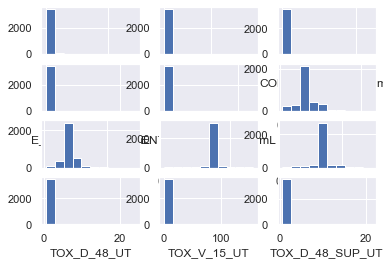

In [ ]:
sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(4, 3)    # Definimos una ventana de 5x4 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,12):
  plt.subplot(4,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(X[X[variables_numericas].columns[k]], bins=10)     # X_train.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(X[variables_numericas].columns[k])
plt.show()

In [ ]:
X[variables_numericas].isna().any()


DQO_mg/L              False
SST_mg/L              False
COLI_FEC_NMP_100mL    False
E_COLI_NMP_100mL      False
ENTEROC_NMP_100mL     False
OD_PORC               False
OD_PORC_SUP           False
OD_PORC_MED           False
OD_PORC_FON           False
TOX_D_48_UT           False
TOX_V_15_UT           False
TOX_D_48_SUP_UT       False
TOX_FIS_SUP_15_UT     False
dtype: bool

<AxesSubplot: >

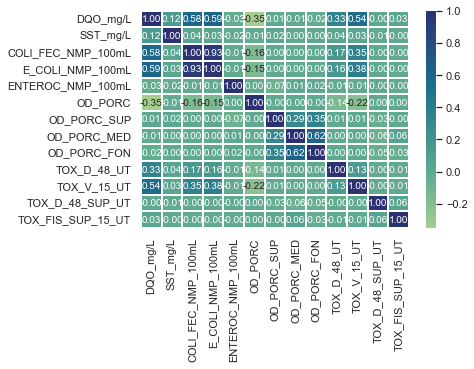

In [ ]:
import seaborn
from seaborn import heatmap
matriz = X[variables_numericas].corr(method='pearson')

seaborn.heatmap(matriz, cmap="crest", annot=True, linewidths=0.1, linecolor='white', fmt=".2f")

<AxesSubplot: >

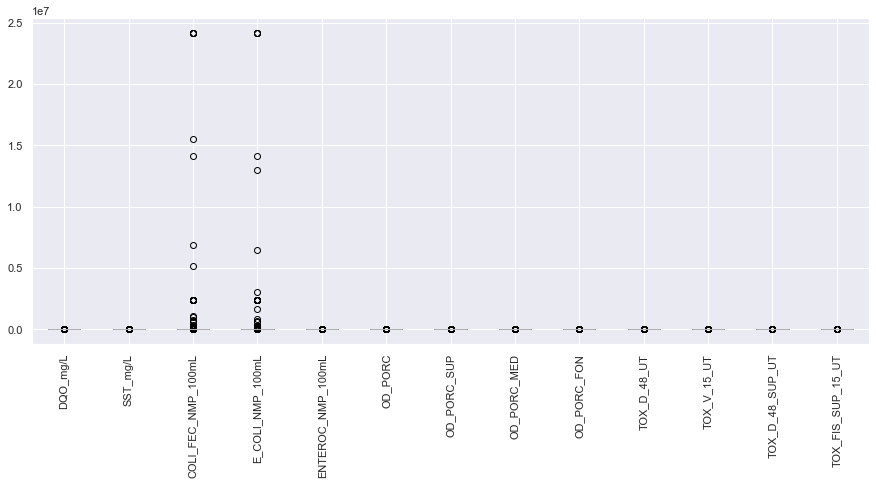

In [ ]:
# Graficamos los datos numéricos de entrada para visualizar los outliers

sns.set(rc={'figure.figsize':(15,6)})
X[variables_numericas].boxplot(rot=90)

In [ ]:
#Identificamos los outliers

Q1 = X[variables_numericas].quantile(0.25)

Q3 = X[variables_numericas].quantile(0.75)

IQR = Q3-Q1

BM = (X[variables_numericas] > (Q3+1.5 *IQR)) | (X[variables_numericas] < (Q1-1.5 *IQR))

#Vemos los valores de los outliers
X[variables_numericas][BM]

,DQO_mg/L,SST_mg/L,COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,ENTEROC_NMP_100mL,OD_PORC,OD_PORC_SUP,OD_PORC_MED,OD_PORC_FON,TOX_D_48_UT,TOX_V_15_UT,TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT
0,NaN,NaN,NaN,NaN,NaN,NaN,46.8,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,20.0,NaN,92.0,95.4,92.2,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,92.0,95.4,92.2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.7,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,30.0,NaN,96.2,95.9,95.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3489,115.88,NaN,NaN,NaN,NaN,NaN,91.6,NaN,NaN,NaN,NaN,NaN,NaN
3490,87.64,NaN,NaN,NaN,NaN,78.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3491,NaN,NaN,NaN,NaN,NaN,76.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# pasamos los outliers al upper cap (Q3+IQR*1.5)

for att in variables_numericas:

    Q3 = X[att].quantile(0.75)

    Q1 = X[att].quantile(0.25)

    IQR = Q3 - Q1

    lower_cap = Q1-IQR*1.5

    upper_cap = Q3+IQR*1.5

    BM = X[att] < lower_cap

    candidate_index = X[BM].index

    X.loc[candidate_index,att] = lower_cap

    BM = X[att] > upper_cap

    candidate_index = X[BM].index

    X.loc[candidate_index,att] = upper_cap

<AxesSubplot: >

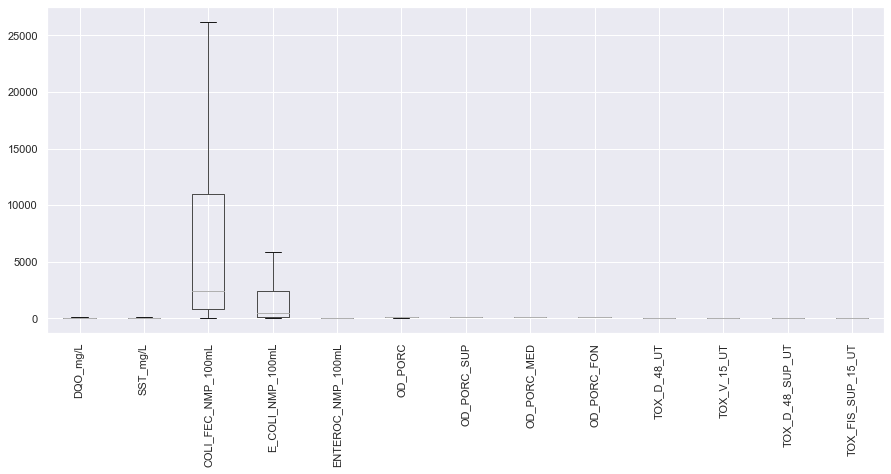

In [ ]:
#Graficamos los resultados nuevamente

sns.set(rc={'figure.figsize':(15,6)})
X[variables_numericas].boxplot(rot=90)

In [ ]:
# Escalamos los datos numéricos de 0 a 1

scaler = MinMaxScaler(feature_range=(0, 1))
X[variables_numericas] = scaler.fit_transform(X[variables_numericas])

<AxesSubplot: >

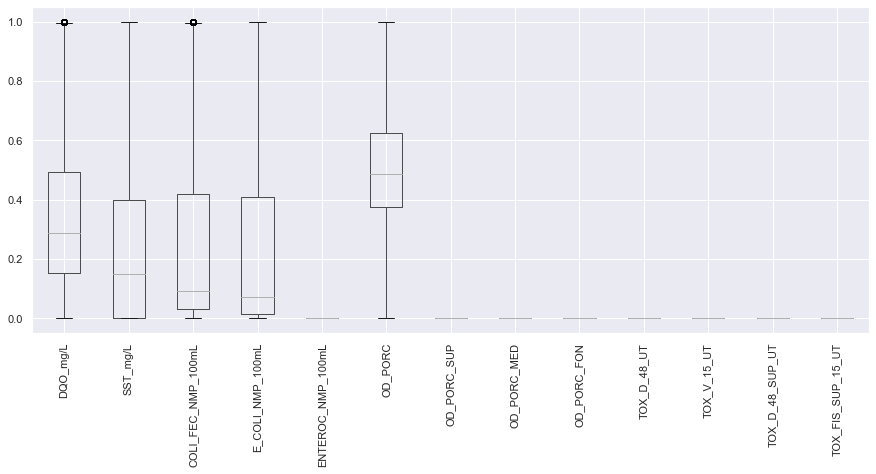

In [ ]:
#Graficamos los resultados nuevamente después de normalizar los valores

sns.set(rc={'figure.figsize':(15,6)})
X[variables_numericas].boxplot(rot=90)

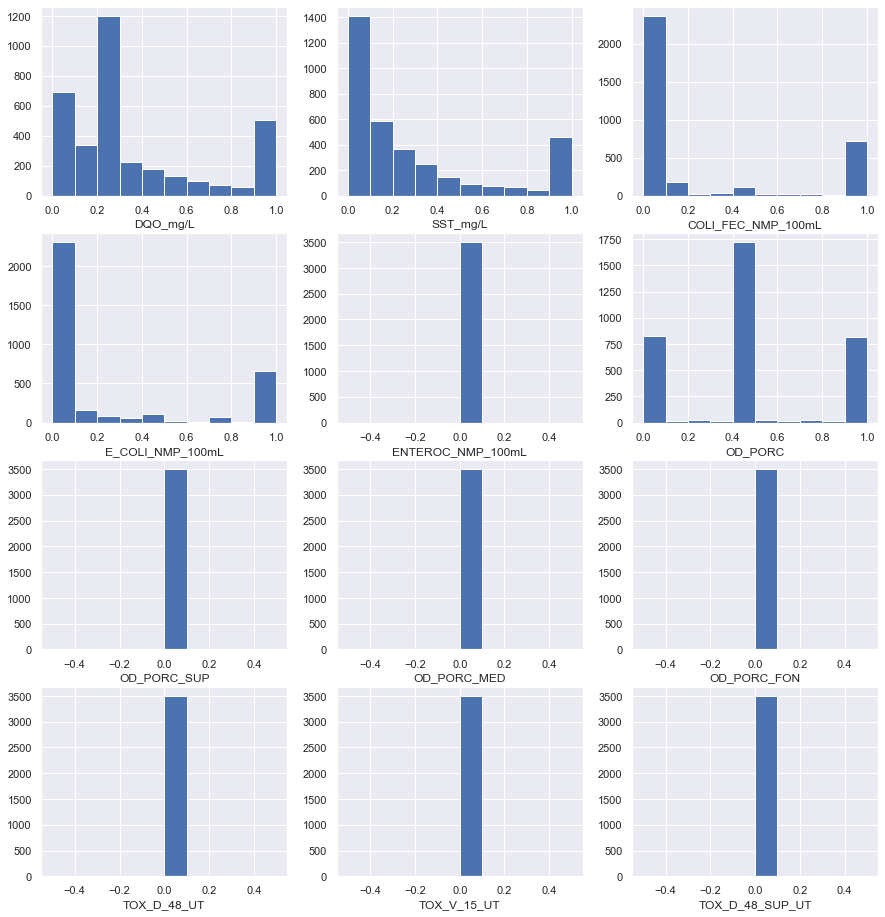

In [ ]:
sns.set(rc={'figure.figsize':(15,16)})
fig, axes = plt.subplots(4, 3)    # Definimos una ventana de 5x4 nichos para incluir en cada uno de ellos un gráfico.
for k in range(0,12):
  plt.subplot(4,3,k+1)     # Los nichos para cada histograma se numeran iniciando en 1.
  plt.hist(X[X[variables_numericas].columns[k]], bins=10)     # X_train.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(X[variables_numericas].columns[k])
plt.show()

In [ ]:
# Visualizamos en el mapa de las ubicaciones de las cuencas identificadas con el semáforo de contaminantes 

df_sup= df['SEMAFORO'].copy()
df_sup.replace("Verde", "green", inplace=True)
df_sup.replace("Rojo", "red", inplace=True)
df_sup.replace("Amarillo", "yellow", inplace=True)

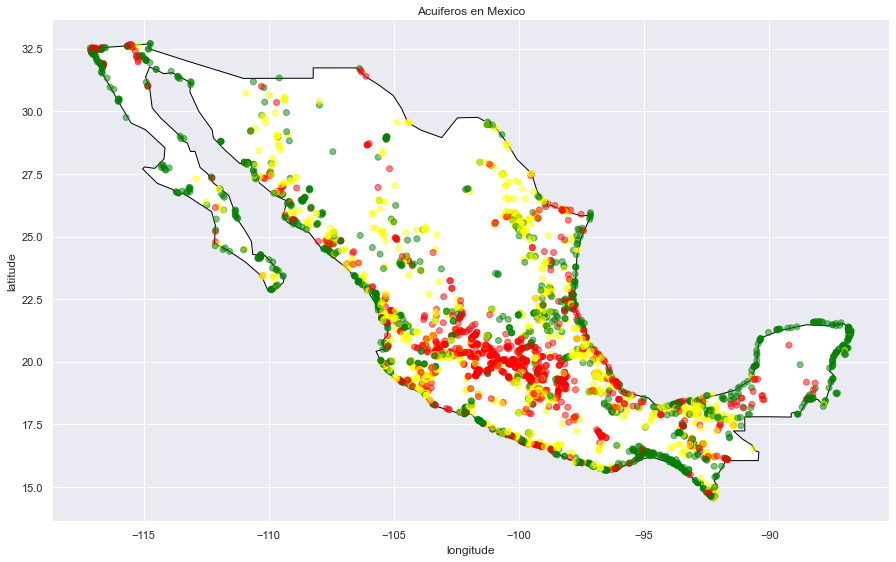

In [ ]:
# Graficamos las ubicaciones con su color en la columna "SEMAFORO"

dot_map = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(15,10))

world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
dot_map.plot(ax=gax, color=df_sup, alpha = 0.5) 
 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Preparación para los Kmeans
kmeans = KMeans(n_clusters=7)
kmeans.fit(df[['LATITUD', 'LONGITUD']])

centers = kmeans.cluster_centers_
centers = pd.DataFrame(centers, columns=['LATITUD', 'LONGITUD'])
centers['Coordinates'] = list(zip(centers['LONGITUD'], centers['LATITUD']))
centers['Coordinates'] = centers['Coordinates'].apply(Point)

g_centers = gpd.GeoDataFrame(centers, geometry='Coordinates')

In [ ]:
X = df[['LONGITUD', 'LATITUD']]

kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #sacar centroides
labels = kmeans.predict(X) #labels predecidos
# Getting the cluster centers
C = kmeans.cluster_centers_ #traigo valores de centroides

C_DF = pd.DataFrame(C) #convertirlo en DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #lo convierte en lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #lo convierte en puntos para gráficar

centroid = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
centroid

,0,1,Coordinates
0,-101.053383,20.847797,POINT (-101.05338 20.84780)
1,-93.476237,17.896671,POINT (-93.47624 17.89667)
2,-110.648349,27.695136,POINT (-110.64835 27.69514)


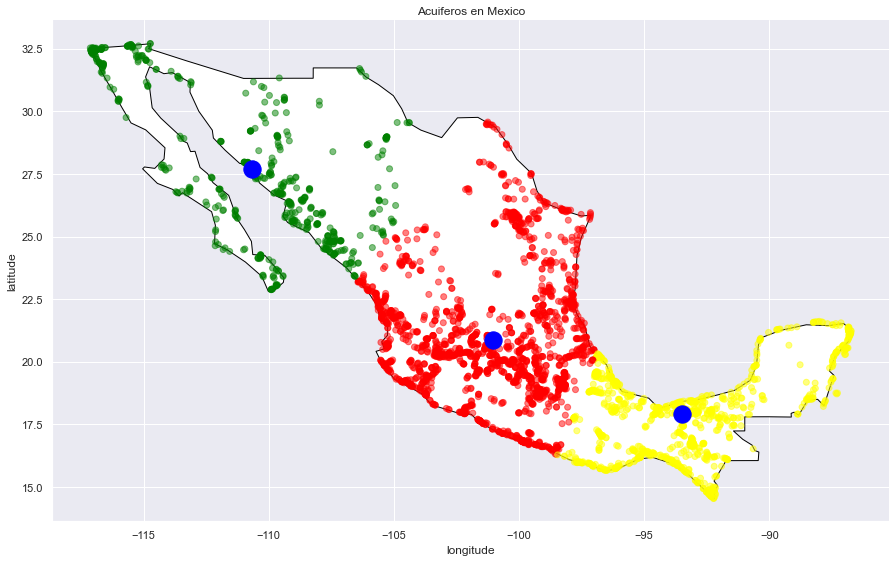

In [ ]:
dot_map = gpd.GeoDataFrame(df.copy(), geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD))

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()

fig, gax = plt.subplots(figsize=(15,10))
colores = ['red','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
dot_map.plot(ax=gax, color=color_asig, alpha = 0.5) 
centroid.plot(ax=gax, color='blue', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
df["SEMAFORO_Type"] = lbe.fit_transform(df["SEMAFORO"])
df["SEMAFORO_Type"].unique()


array([1, 2, 0])

In [ ]:
# Comprobación de los nombres numéricos de las variables de salida

df[['SEMAFORO','SEMAFORO_Type']].head(10)



,SEMAFORO,SEMAFORO_Type
0,Rojo,1
1,Verde,2
2,Verde,2
3,Verde,2
4,Verde,2
5,Verde,2
6,Verde,2
7,Rojo,1
8,Amarillo,0
9,Amarillo,0


In [ ]:
import sklearn


In [ ]:
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from missingpy import MissForest

In [ ]:
pip install missingpy 

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
imputador = MissForest(max_iter=12, n_jobs=-1)
X_imputador = imputador.fit_transform(df[variables_numericas])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn

Iteration: 0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn

Iteration: 1


In [ ]:
X_imputador[:, :5]


array([[5.408000e+01, 1.375000e+01, 1.162000e+03, 9.800000e+01,
        8.830142e+03],
       [3.346050e+01, 5.000000e+00, 1.691680e+05, 3.676097e+04,
        2.000000e+01],
       [3.346050e+01, 5.000000e+00, 1.691680e+05, 3.676097e+04,
        1.500000e+00],
       ...,
       [8.764000e+01, 7.000000e+01, 2.400000e+02, 1.500000e+01,
        9.226636e+03],
       [3.592000e+01, 5.600000e+01, 2.400000e+03, 1.100000e+01,
        8.122690e+03],
       [3.460000e+01, 4.500000e+01, 2.400000e+03, 1.500000e+01,
        8.364600e+03]])

In [ ]:
# Add imputed values as columns to the untouched dataset
mfColumns = []
index = 0

for column in variables_numericas:
  mfColumns.append(column)
  strNew = 'MF_'+column
  mfColumns.append(strNew)
  df[strNew] = X_imputador[:,index]
  index+=1

In [ ]:
comparison_df = df[mfColumns]


In [ ]:
comparison_df

,DQO_mg/L,MF_DQO_mg/L,SST_mg/L,MF_SST_mg/L,COLI_FEC_NMP_100mL,MF_COLI_FEC_NMP_100mL,E_COLI_NMP_100mL,MF_E_COLI_NMP_100mL,ENTEROC_NMP_100mL,MF_ENTEROC_NMP_100mL,...,OD_PORC_FON,MF_OD_PORC_FON,TOX_D_48_UT,MF_TOX_D_48_UT,TOX_V_15_UT,MF_TOX_V_15_UT,TOX_D_48_SUP_UT,MF_TOX_D_48_SUP_UT,TOX_FIS_SUP_15_UT,MF_TOX_FIS_SUP_15_UT
0,54.08,54.08000,13.75,13.7500,1162,1162.0,98,98.00,NaN,8830.142,...,NaN,38.573,NaN,0.50735,NaN,0.50000,0.5,0.5000,0.5,0.5
1,NaN,33.46050,5,5.0000,NaN,169168.0,NaN,36760.97,20,20.000,...,92.2,92.200,NaN,0.55957,NaN,0.50000,NaN,0.5757,0.5,0.5
2,NaN,33.46050,5,5.0000,NaN,169168.0,NaN,36760.97,1.5,1.500,...,92.2,92.200,NaN,0.55957,NaN,0.50000,NaN,0.5757,0.5,0.5
3,NaN,34.85148,13.9667,13.9667,NaN,169168.0,NaN,109684.53,1.5,1.500,...,86.7,86.700,NaN,0.51609,NaN,0.50000,NaN,0.5508,0.5,0.5
4,NaN,35.11780,5,5.0000,NaN,168958.7,NaN,36759.00,30,30.000,...,95.5,95.500,NaN,0.55957,NaN,0.50000,NaN,0.5693,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,5,5.00000,122,122.0000,2400,2400.0,2400,2400.00,NaN,10417.260,...,NaN,72.512,0.5,0.50000,0.5,0.50000,NaN,0.5563,NaN,0.5
3489,115.88,115.88000,54,54.0000,2400,2400.0,4,4.00,NaN,7090.939,...,NaN,77.916,NaN,0.55003,NaN,0.96893,0.5,0.5000,0.5,0.5
3490,87.64,87.64000,70,70.0000,240,240.0,15,15.00,NaN,9226.636,...,NaN,76.482,0.5,0.50000,0.5,0.50000,NaN,0.5000,NaN,0.5
3491,35.92,35.92000,56,56.0000,2400,2400.0,11,11.00,NaN,8122.690,...,NaN,75.279,0.5,0.50000,0.5,0.50000,NaN,0.5000,NaN,0.5


In [ ]:
X = X_imputador
y = df['SEMAFORO_Type']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [ ]:
# Creating the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=5, min_samples_leaf=5)
  
    # Performing training
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=100)

In [ ]:
SemaforosNombres = df["SEMAFORO"].unique()
SemaforosNombres

array(['Rojo', 'Verde', 'Amarillo'], dtype=object)

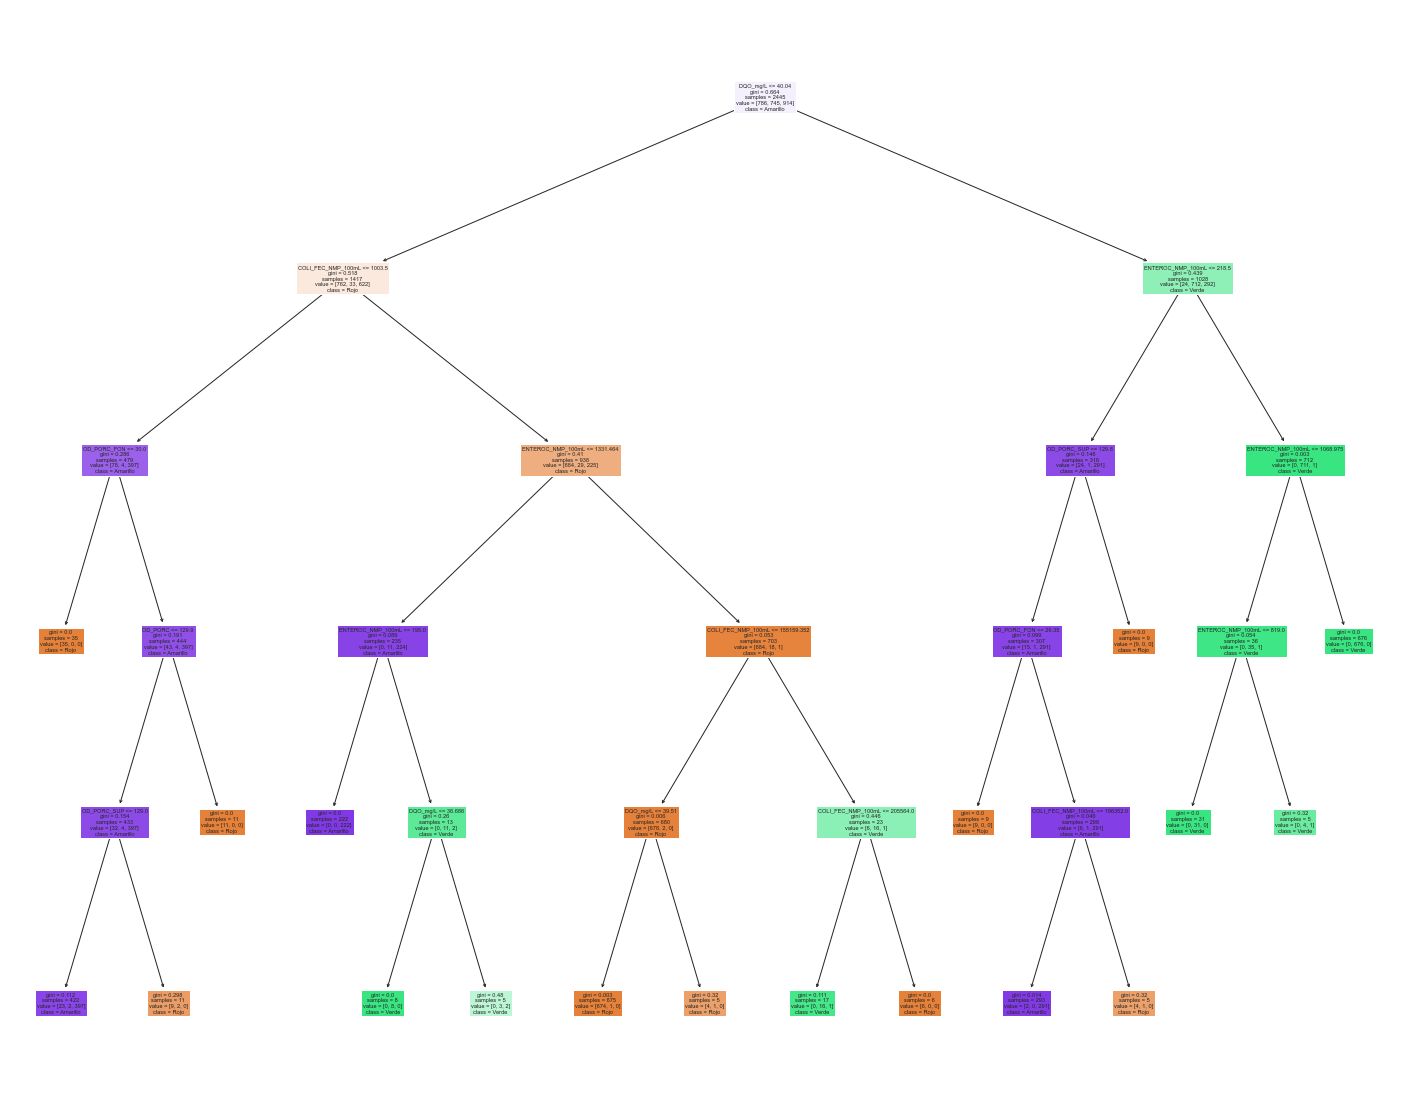

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_gini, 
                   feature_names=variables_numericas,  
                   class_names=SemaforosNombres,
                   filled=True)


In [ ]:
y_pred_en = clf_gini.predict(X_test)
y_pred_en

array([0, 0, 1, ..., 2, 1, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred_en)
accuracy = sum(cm[i][i] for i in range(3)) / y_test.shape[0]
print("accuracy = " + str(accuracy))

accuracy = 0.9904580152671756


In [ ]:
from sklearn.metrics import accuracy_score
print (("Accuracy is"), accuracy_score (y_test,y_pred_en) *100)

Accuracy is 99.04580152671755


###**Conclusiones**

